    
# Ana Cristina Theisges
# Lighthouse Indicium | Cientista de Dados

O objetivo deste notebook é descrever os procedimentos e códigos utilizados para realização do Desafio de Cientista de Dados do Programa Lighthouse da Indicium.

In [1]:
# importação das bibliotecas e diretório de dados

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #biblioteca gráfica
import seaborn as sns # statistical data visualization
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn.svm import SVR
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import scipy as sp


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/indicium-precificacao/teste_indicium_precificacao.csv


**Questão 1**<br><br>
**ANÁLISE EXPLORATÓRIA DOS DADOS**

In [2]:
# Visualização do dataset e análise dos atributos

dataframe = pd.read_csv('/kaggle/input/indicium-precificacao/teste_indicium_precificacao.csv')
dataframe.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6


In [3]:
# Visualização do dataset e análise dos atributos

dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

O dataset possui 16 colunas de atributos/variáveis e 48.894 amostras. Algumas colunas possuem dados numéricos e outras são objetos. 

In [4]:
#descartando amostras com valores ausentes (NaN)

dataframe = dataframe.dropna(axis = 0)
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38820 entries, 0 to 48851
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             38820 non-null  int64  
 1   nome                           38820 non-null  object 
 2   host_id                        38820 non-null  int64  
 3   host_name                      38820 non-null  object 
 4   bairro_group                   38820 non-null  object 
 5   bairro                         38820 non-null  object 
 6   latitude                       38820 non-null  float64
 7   longitude                      38820 non-null  float64
 8   room_type                      38820 non-null  object 
 9   price                          38820 non-null  int64  
 10  minimo_noites                  38820 non-null  int64  
 11  numero_de_reviews              38820 non-null  int64  
 12  ultima_review                  38820 non-null  obje

Ao descartar as amostras com valores nulos restaram 38.820 linhas.

In [5]:
#considerando que a coluna room_type não é um dado númerico foi necessário realizar adequação para que se torne uma variável numérica.
contagem = dataframe['room_type'].value_counts()
print(contagem)

room_type
Entire home/apt    20321
Private room       17653
Shared room          846
Name: count, dtype: int64


In [6]:
#remapeamento da coluna room_type para utilização no modelo
mapeamento = {'Entire home/apt': 1, 'Private room': 2, 'Shared room': 3}
dataframe['room_type_remap'] = dataframe['room_type'].map(mapeamento)

dataframe.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,room_type_remap
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,2
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,2
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,2
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,1
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,1
10,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39,2


In [7]:
#outro atributo qur pode auxiliar no entendimento do preço é o bairro, que também necessita de remapeamento
contagem = dataframe['bairro_group'].value_counts()
print(contagem)

bairro_group
Manhattan        16621
Brooklyn         16438
Queens            4572
Bronx              875
Staten Island      314
Name: count, dtype: int64


In [8]:
#remapeamento da coluna bairro_group para utilização no modelo
mapeamento_bairro = {'Manhattan': 1, 'Brooklyn': 2, 'Queens': 3, 'Bronx': 4, 'Staten Island': 5}
dataframe['bairro_group_remap'] = dataframe['bairro_group'].map(mapeamento_bairro)

dataframe.head(10)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,room_type_remap,bairro_group_remap
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,1,1
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194,1,2
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0,1,1
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129,1,1
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0,2,2
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220,2,1
7,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,2,1
8,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188,1,1
9,5295,Beautiful 1br on Upper West Side,7702,Lena,Manhattan,Upper West Side,40.80316,-73.96545,Entire home/apt,135,5,53,2019-06-22,0.43,1,6,1,1
10,5441,Central Manhattan/near Broadway,7989,Kate,Manhattan,Hell's Kitchen,40.76076,-73.98867,Private room,85,2,188,2019-06-23,1.50,1,39,2,1


In [9]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38820 entries, 0 to 48851
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             38820 non-null  int64  
 1   nome                           38820 non-null  object 
 2   host_id                        38820 non-null  int64  
 3   host_name                      38820 non-null  object 
 4   bairro_group                   38820 non-null  object 
 5   bairro                         38820 non-null  object 
 6   latitude                       38820 non-null  float64
 7   longitude                      38820 non-null  float64
 8   room_type                      38820 non-null  object 
 9   price                          38820 non-null  int64  
 10  minimo_noites                  38820 non-null  int64  
 11  numero_de_reviews              38820 non-null  int64  
 12  ultima_review                  38820 non-null  obje

**Questão 2(a)**<br><br>
**Supondo que uma pessoa esteja pensando em investir em um
apartamento para alugar na plataforma, onde seria mais indicada a
compra?**

In [10]:
#para solucionar a questão 2(a) foi calculada a média do preço por bairros, sendo o Manhattan apresentou média de alugéis mais alta, portanto, seria o grupo de bairro adequado para investir.
media_por_categoria = dataframe.groupby('bairro_group')['price'].mean()

print(media_por_categoria)

bairro_group
Bronx             79.558857
Brooklyn         121.461613
Manhattan        180.071596
Queens            95.783683
Staten Island     89.964968
Name: price, dtype: float64


In [11]:
df_ordenado = dataframe.sort_values(by='price', ascending=False)
df_ordenado.head(20)

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,room_type_remap,bairro_group_remap
17691,13894339,Luxury 1 bedroom apt. -stunning Manhattan views,5143901,Erin,Brooklyn,Greenpoint,40.73260,-73.95739,Entire home/apt,10000,5,5,2017-07-27,0.16,1,0,1,2
9150,7003697,Furnished room in Astoria apartment,20582832,Kathrine,Queens,Astoria,40.76810,-73.91651,Private room,10000,100,2,2016-02-13,0.04,1,0,2,3
12341,9528920,"Quiet, Clean, Lit @ LES & Chinatown",3906464,Amy,Manhattan,Lower East Side,40.71355,-73.98507,Private room,9999,99,6,2016-01-01,0.14,1,83,2,1
6529,4737930,Spanish Harlem Apt,1235070,Olson,Manhattan,East Harlem,40.79264,-73.93898,Entire home/apt,9999,5,1,2015-01-02,0.02,1,0,1,1
30267,23377410,Beautiful/Spacious 1 bed luxury flat-TriBeCa/Soho,18128455,Rum,Manhattan,Tribeca,40.72197,-74.00633,Entire home/apt,8500,30,2,2018-09-18,0.18,1,251,1,1
4376,2953058,Film Location,1177497,Jessica,Brooklyn,Clinton Hill,40.69137,-73.96723,Entire home/apt,8000,1,1,2016-09-15,0.03,11,365,1,2
45665,34895693,Gem of east Flatbush,262534951,Sandra,Brooklyn,East Flatbush,40.65724,-73.92450,Private room,7500,1,8,2019-07-07,6.15,2,179,2,2
3536,2110145,UWS 1BR w/backyard + block from CP,2151325,Jay And Liz,Manhattan,Upper West Side,40.77782,-73.97848,Entire home/apt,6000,14,17,2015-02-17,0.27,1,359,1,1
43008,33397385,Midtown Manhattan great location (Gramacy park),16105313,Debra,Manhattan,Midtown,40.74482,-73.98367,Entire home/apt,5100,30,1,2019-06-22,1.00,2,343,1,1
4344,2919330,NearWilliamsburg bridge 11211 BK,14908606,Bianca,Brooklyn,Bedford-Stuyvesant,40.69572,-73.95731,Private room,5000,6,10,2016-01-02,0.16,1,363,2,2


**Questão 2(c)**<br><br>
**Existe algum padrão no texto do nome do local para lugares de mais
alto valor?**
Ao avaliar os 20 nomes de mais valor não foi identificado um padrão recorrente. Palavras como Luxury e Beautiful aparecem, mas,sem uma frequência definida. 

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'host_id'}>,
        <Axes: title={'center': 'latitude'}>],
       [<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'minimo_noites'}>],
       [<Axes: title={'center': 'numero_de_reviews'}>,
        <Axes: title={'center': 'reviews_por_mes'}>,
        <Axes: title={'center': 'calculado_host_listings_count'}>],
       [<Axes: title={'center': 'disponibilidade_365'}>,
        <Axes: title={'center': 'room_type_remap'}>,
        <Axes: title={'center': 'bairro_group_remap'}>]], dtype=object)

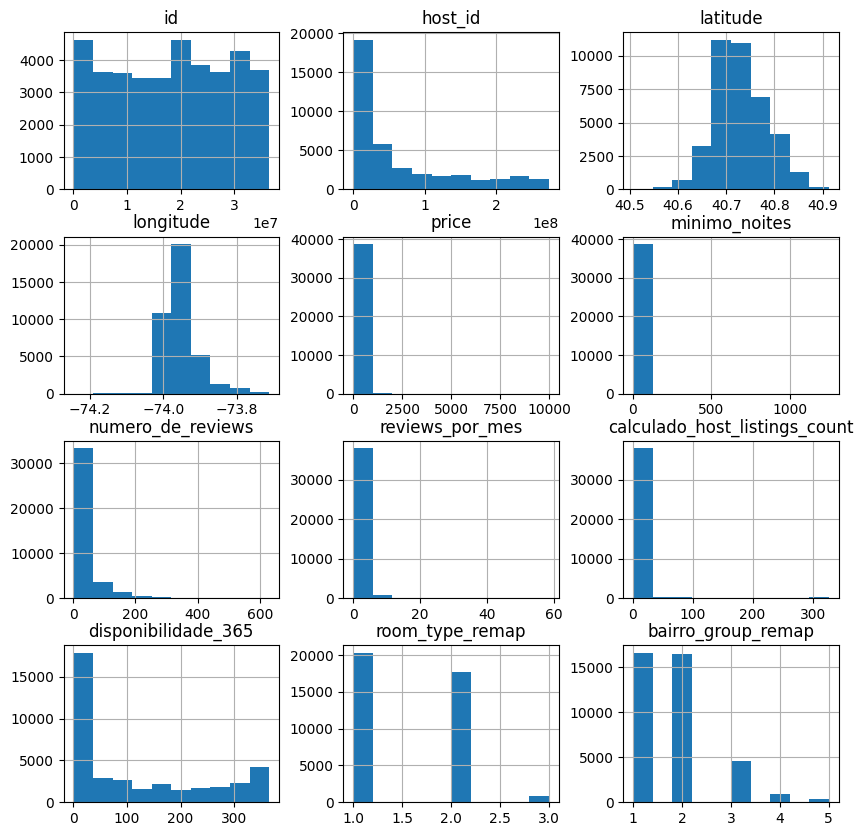

In [12]:
dataframe.hist(figsize=(10,10))

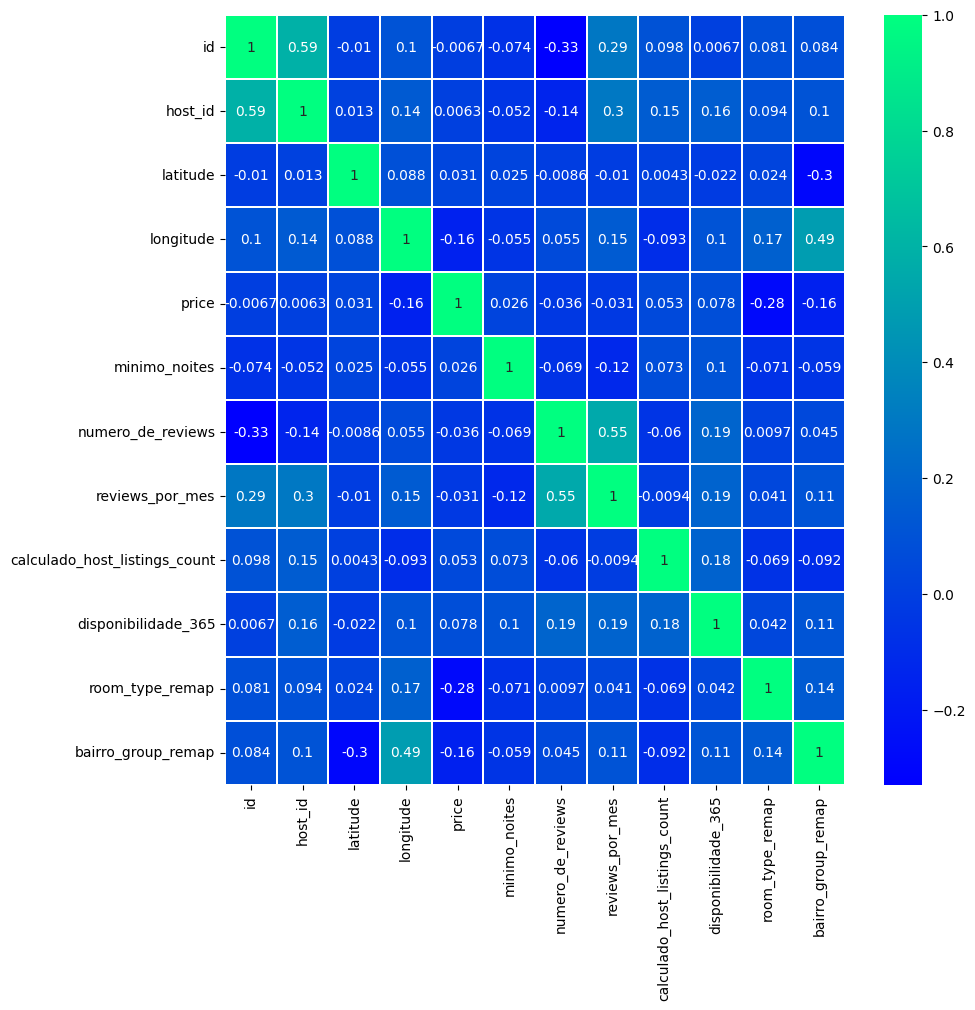

In [13]:
# Visualização do dataset e análise dos atributos: matriz de correlação entre as variáveis
#filtro das variáveis numéricas (drop de variáveis não númericas)
dataframe_filter = dataframe.drop(['nome', 'host_name', 'bairro_group', 'bairro', 'room_type', 'ultima_review'], axis=1)
plt.figure(figsize=(10,10))
sns.heatmap(dataframe_filter.corr(),linewidth=0.01,annot=True,cmap="winter")
plt.show()

Em geral o dataset possui baixa correlação entre as variáveis. 

<Axes: xlabel='bairro_group_remap', ylabel='price'>

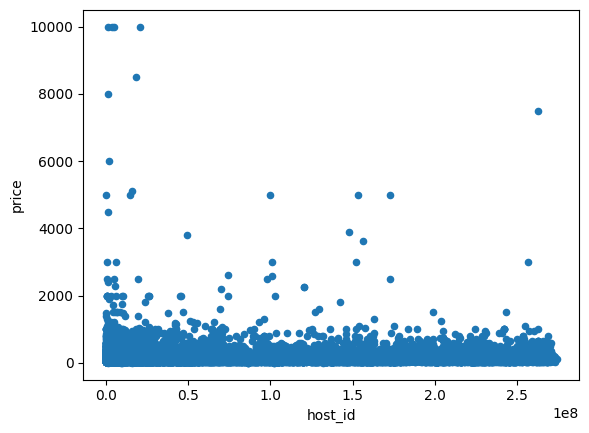

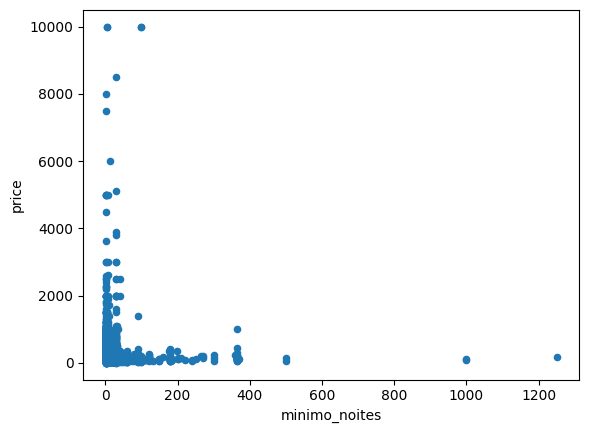

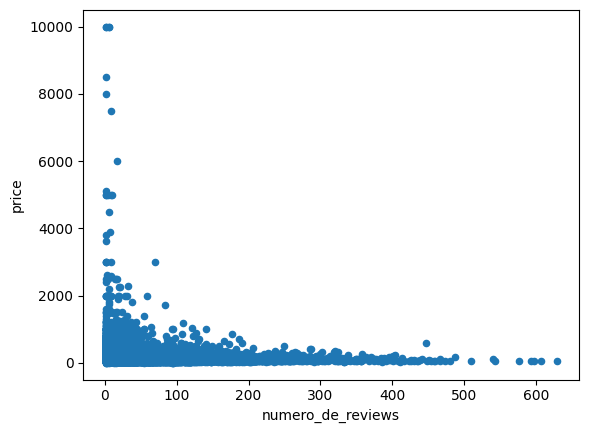

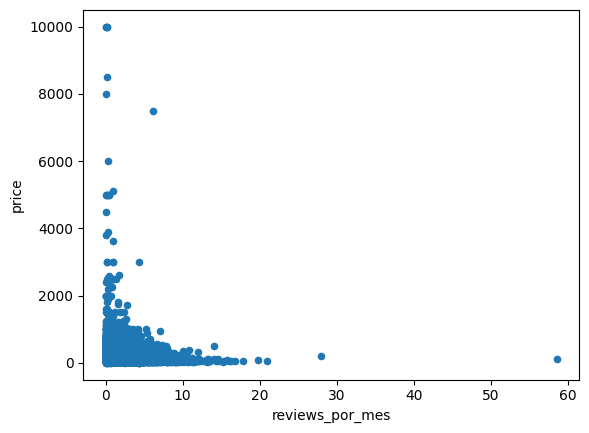

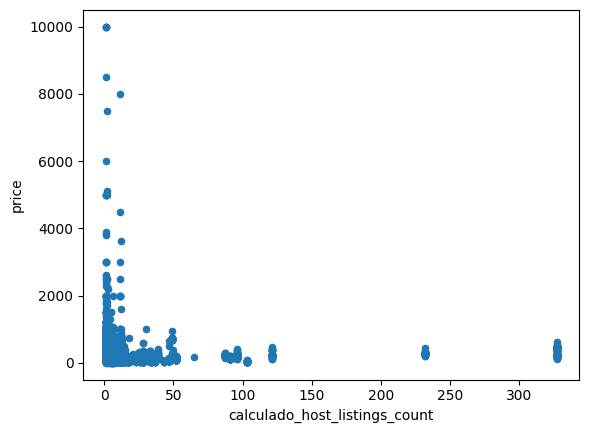

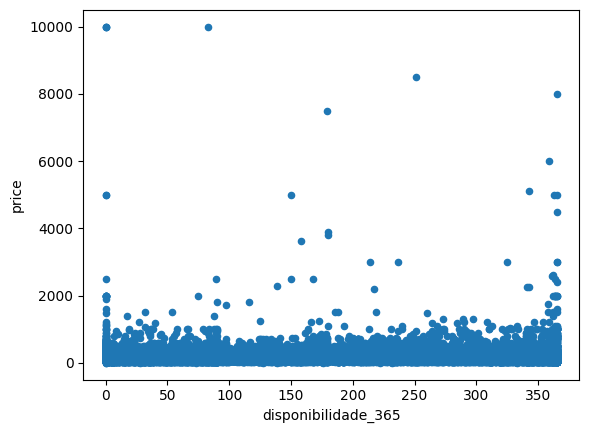

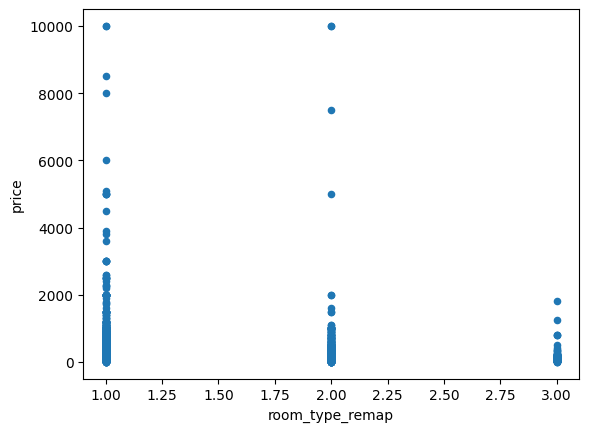

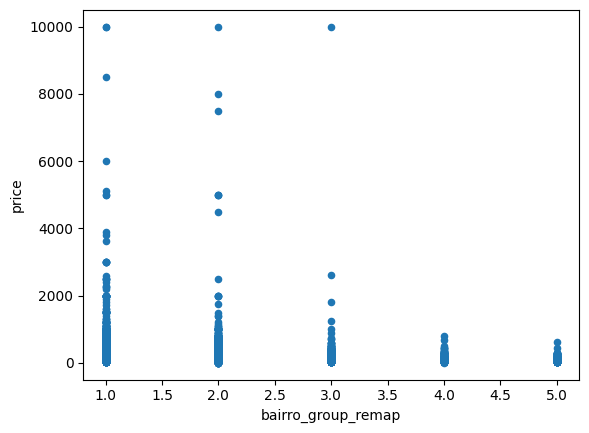

In [14]:
#variáveis numéricas em relação ao target (preço), onde x são as variáveis independentes e o y a variável dependente (que se quer prever)

dataframe_filter.plot.scatter(x = 'host_id', y = 'price')
#dataframe_filter.plot.scatter(x = 'latitude', y = 'price')
#dataframe_filter.plot.scatter(x = 'longitude', y = 'price')
dataframe_filter.plot.scatter(x = 'minimo_noites', y = 'price')
dataframe_filter.plot.scatter(x = 'numero_de_reviews', y = 'price')
dataframe_filter.plot.scatter(x = 'reviews_por_mes', y = 'price')
dataframe_filter.plot.scatter(x = 'calculado_host_listings_count', y = 'price')
dataframe_filter.plot.scatter(x = 'disponibilidade_365', y = 'price')
dataframe_filter.plot.scatter(x = 'room_type_remap', y = 'price')
dataframe_filter.plot.scatter(x = 'bairro_group_remap', y = 'price')

**Questão 3 - Criando o modelo de previsão do preço**

Observando a matriz de correlação e os gráficos de variáveis independentes vs o preço (variável dependente) não foi possível identificar uma relação linear entre os dados. Portanto, não seria possível descrevê-los através de uma regressão linear simples.
Ainda que tenha sido realizado o tratamento da base (valores vazios e transformação para númerico e campos importantes) não foi observada relação linear. 
Diante disso, será realizada a tentativa de prever o preço utilizando regressão multivariada.

# **REGRESSÃO MULTIVARIADA**
Nesta seção serão descritos os procedimentos e códigos utilizados para prever o preço utilizando regressão multivariada.

# **SELEÇÃO DAS VARIÁVEIS PARA MODELO**


In [15]:
#Todas as variáveis numéricas são o X e o price é o y
X = dataframe_filter.drop(['price'], axis=1)
#print(X)
y = dataframe_filter['price']
#print(y)

#X = X.values
#y = y.values

#Foi utilizada uma amostragem de 5.000 da base para treinamento do modelo
X, y = make_regression(n_samples=5000, n_features=10, noise=0.1, random_state=42)

# Utilizando ANOVA para selecionar as melhores 5 variáveis
selector = SelectKBest(score_func=f_regression, k=5)
X_selected = selector.fit_transform(X, y)

# As variáveis selecionadas foram utilizadas para treinar o modelo de regressão linear
model = LinearRegression()
model.fit(X_selected, y)

# Resultados
score = model.score(X_selected, y)
print("Score do modelo:", score)

# Índices das variáveis selecionadas
selected_indices = selector.get_support(indices=True)
print("Índices das características selecionadas:", selected_indices)


Score do modelo: 0.9913908614823638
Índices das características selecionadas: [1 3 5 6 9]


O modelo selecionou as 5 variáveis que melhor explicam o preço considerando uma amostragem de 5.000 amostras. O Score do modelo foi de 0.99 atendendo de forma satisfatória e explicando o preço em 99% dos casos.

1 = host_id;
3 = longitude;
5 = minimo_noites;
6 = numero_de_reviews;
9 = disponibilidade_365;

**Questão 2(b)**<br><br>
**O número mínimo de noites e a disponibilidade ao longo do ano
interferem no preço?**
Sim, de acordo com a análise ANOVA que utiliza variância para determinar as variáveis preditivas, o mínimo de noites e a disponibilidade ao longo do ano são variáveis que interferem no preço e podem ser utilizadas em um modelo de regressão para prever o preço de aluguel. 

In [16]:
dataframe_filter.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38820 entries, 0 to 48851
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             38820 non-null  int64  
 1   host_id                        38820 non-null  int64  
 2   latitude                       38820 non-null  float64
 3   longitude                      38820 non-null  float64
 4   price                          38820 non-null  int64  
 5   minimo_noites                  38820 non-null  int64  
 6   numero_de_reviews              38820 non-null  int64  
 7   reviews_por_mes                38820 non-null  float64
 8   calculado_host_listings_count  38820 non-null  int64  
 9   disponibilidade_365            38820 non-null  int64  
 10  room_type_remap                38820 non-null  int64  
 11  bairro_group_remap             38820 non-null  int64  
dtypes: float64(3), int64(9)
memory usage: 3.9 MB


In [17]:
# Utilizando todas as amostras do dataset e dividindo o dataset em 20% de teste e 80% de treino
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Treinando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train)

# Previsões no conjunto de teste
predictions = model.predict(X_test)

# Avaliação do modelo
mse = mean_squared_error(y_test, predictions)
print("Erro quadrático médio:", mse)

# Calculando o coeficiente de determinação (R²) no conjunto de teste
r2 = model.score(X_test, y_test)
print("Coeficiente de determinação (R²):", r2)

Erro quadrático médio: 233.14817438541303
Coeficiente de determinação (R²): 0.9919190692477287


In [18]:
#exportanto modelo como pkl

import pickle

with open('modelo_regressao.pkl', 'wb') as f:
    pickle.dump(model, f)

**Questão 4**<br><br>
**Prever o preço de um apartamento com as seguintes características:**
{'id': 2595,
'nome': 'Skylit Midtown Castle',
'host_id': 2845,
'host_name': 'Jennifer',
'bairro_group': 'Manhattan',
'bairro': 'Midtown',
'latitude': 40.75362,
'longitude': -73.98377,
'room_type': 'Entire home/apt',
'price': 225,
'minimo_noites': 1,
'numero_de_reviews': 45,
'ultima_review': '2019-05-21',
'reviews_por_mes': 0.38,
'calculado_host_listings_count': 2,
'disponibilidade_365': 355}

In [19]:
# Características do imóvel para previsão
caracteristicas_imovel = [[2845, -73.98377, 1, 45, 355]]

# Realize a previsão usando o modelo treinado
previsao = model.predict(caracteristicas_imovel)

print("Preço previsto do imóvel:", previsao[0]) 


Preço previsto do imóvel: 299792.7674765972


O resultado de preço para um novo dado não foi satisfatório e possivelmente o modelo pode estar com overfitting, ou seja, decorou o conjunto de treinamento e não é adequado para novos dados. 